In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('bmh')

df = pd.read_csv('Vendas.csv', delimiter=',')


## Busca A


In [3]:
data = []
dic = {}

for index, row in df.iterrows():
    data = list(map(int, row['Data Venda'].split('/')))
    aux = data[2]
    if aux in dic:
        dic[data[2]] += row['ValorVenda']
    else:
        dic[data[2]] = row['ValorVenda']
        

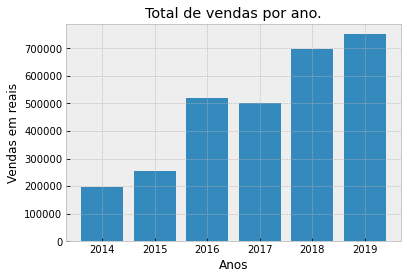

In [4]:
plt.bar(list(dic.keys()), list(dic.values()))
plt.title("Total de vendas por ano.")
plt.xlabel("Anos")
plt.ylabel("Vendas em reais")
plt.show()


## Busca B


In [5]:
cat = {}

for index, row in df.iterrows():
    ax = row['Categoria']
    if ax in cat:
        cat[ax] += int(row['ValorVenda'])
    else:
        cat[ax] = int(row['ValorVenda'])

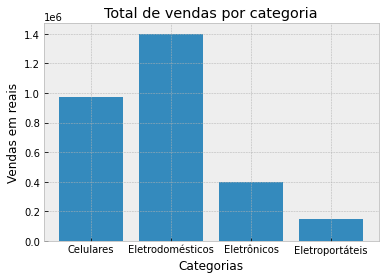

In [6]:
plt.bar(list(cat.keys()), list(cat.values()))
plt.title("Total de vendas por categoria")
plt.xlabel("Categorias")
plt.ylabel("Vendas em reais")
plt.show()

## Busca C

In [7]:
ano = {}
categoria = {}
values = []

for index, row in df.iterrows():
    dia, mes, ano = row['Data Venda'].split('/')
    categoria = row['Categoria']

for ano in range(len(ano)):
    for categoria in range(len(categoria)):
        



IndentationError: expected an indented block (<ipython-input-7-af07611dc000>, line 12)

## Busca D


## Busca E

## Busca F


## Busca G

## Busca H
### pt. 1

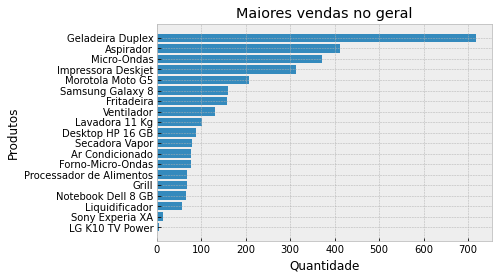

In [8]:
# carregando base de dados em formato de tupla
# (nome_item, nome_loja)

prodLoja = []
for index, row in df.iterrows():
    prodLoja.append(tuple([row['Produto'], row['Loja']]))


# --------------------- 1a parte da questao -------------------------------- 
''' prodLoja(produto/item[0], loja[1]) '''
dicItems = {x[0] for x in prodLoja} 
qntItemsGlobal = []

''' adicionando em qntItemsGlobal o produto e sua quantidade '''
for item in dicItems:
    qntItemsGlobal.append([item, [x[0] for x in prodLoja].count(item)])

''' ordenando em ordem decrescente '''
ordItems = sorted(qntItemsGlobal, key = lambda x : x[1])

prods, qnt = [], []

for i in range(len(ordItems)):
    prods.append(ordItems[i][0])
    qnt.append(int(ordItems[i][1]))

plt.title("Maiores vendas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.barh(prods, qnt)
plt.show()




#TODO: revisar resposta

## Busca H
### pt. 2


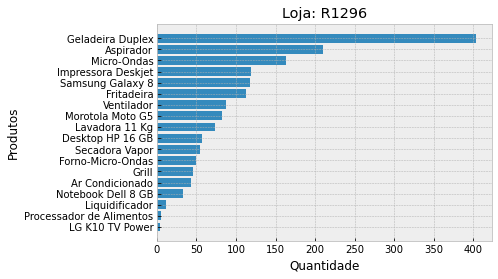

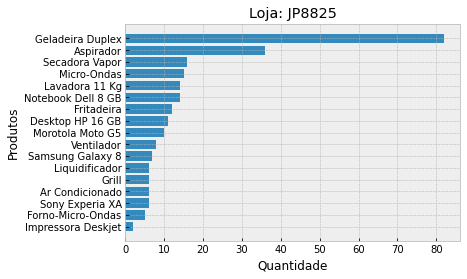

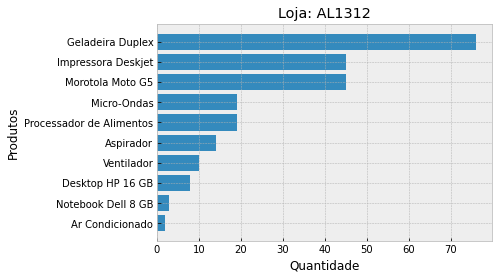

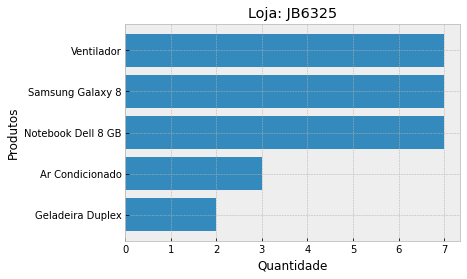

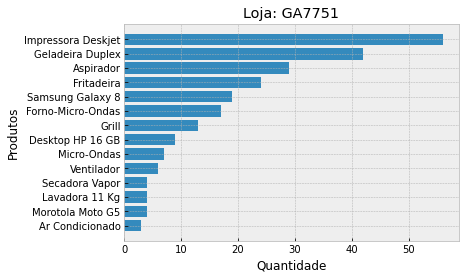

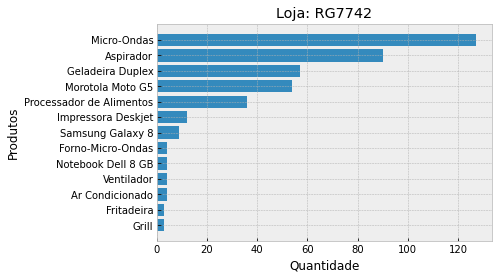

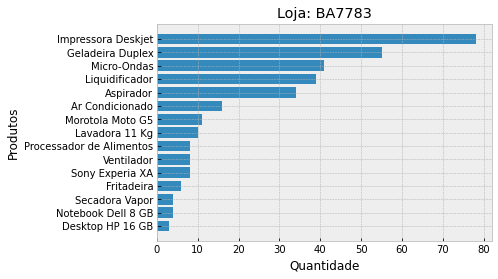

In [14]:
# --------------------- 2a parte da questao --------------------------------
''' preechendo dicLojas com todas as lojas da base. 
    prodLoja(produto/item[0], loja[1]) '''
dicLojas = {x[1] for x in prodLoja} 

''' para cada loja, é adicionada os items respectivos a ela em itemLoja
    se a loja da dupla verificada for a mesma que a loja verificada a vez
    itemLoja recebe (item, loja). '''
for loja in dicLojas:
    itemLoja = []
    for dupla in prodLoja:
        if dupla[1] == loja:
            itemLoja.append(dupla)
    ordItemLoja = []

    ''' set = conjunto disjunto; items nao repetidos
        ordItemLoja recebe o item e a quantidade do mesmo para a loja em questao
        ordItemLoja é ordenado '''
    for item in set(itemLoja):
        ordItemLoja.append([item[0], itemLoja.count(item)])
    ordItemLoja = sorted(ordItemLoja, key = lambda x : x[1], reverse = False)

#     print(f'Loja: {loja}, item: {ordItemLoja}')
    title = f'Loja: {loja}'
    plt.title(title)
    plt.xlabel("Quantidade")
    plt.ylabel("Produtos")
    plt.barh([n[0] for n in ordItemLoja], [n[1] for n in ordItemLoja])
    plt.show()
    
    #TODO: revisar resposta
    

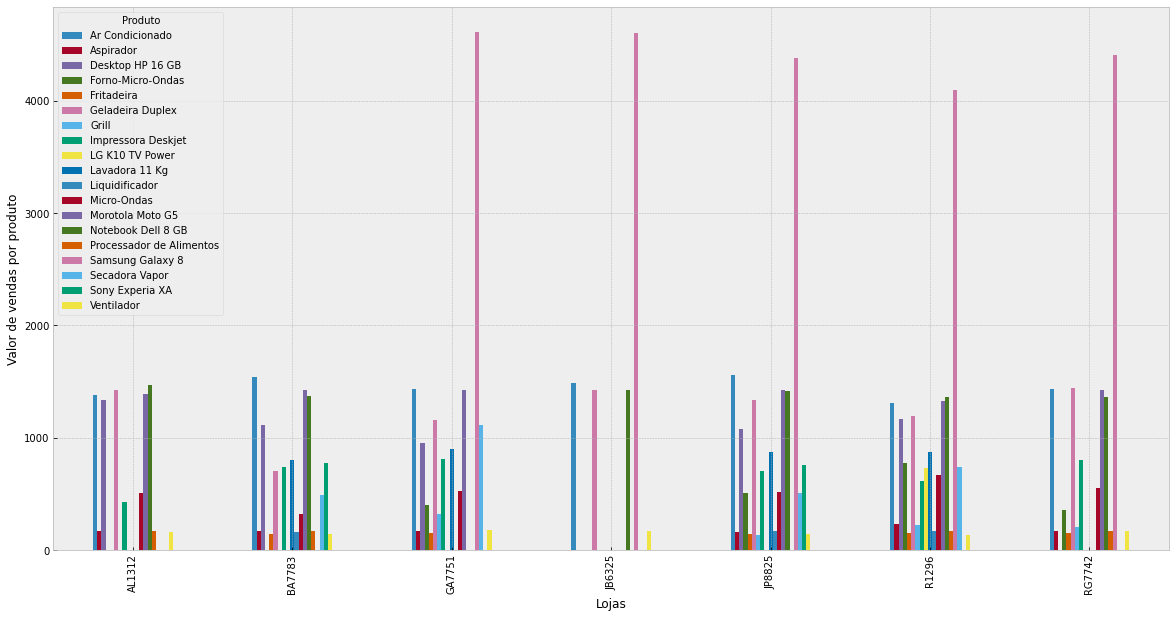

In [28]:
df_pivot = pd.pivot_table(
    df,
    values="ValorVenda",
    index="Loja",
    columns="Produto",
    aggfunc=np.mean
)
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(20, 10)
# Change the axes labels
ax.set_xlabel("Lojas")
ax.set_ylabel("Valor de vendas por produto")

# Use this to show the plot in a new window
# plt.show()
# Export the plot as a PNG file
fig.savefig("page_views_barplot.png")


## Busca I
### pt. 1

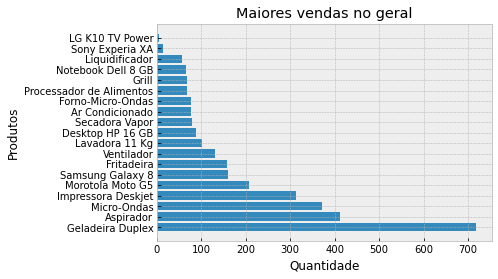

In [15]:
prods.reverse()
qnt.reverse()
plt.title("Maiores vendas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.barh(prods, qnt)
plt.show()




#TODO: revisar resposta


## Busca I
### pt. 2

In [16]:
for loja in dicLojas:
    itemLoja = []
    for dupla in prodLoja:
        if dupla[1] == loja:
            itemLoja.append(dupla)
    ordItemLoja = []

    ''' set = conjunto disjunto; items nao repetidos
        ordItemLoja recebe o item e a quantidade do mesmo para a loja em questao
        ordItemLoja é ordenado '''
    for item in set(itemLoja):
        ordItemLoja.append([item[0], itemLoja.count(item)])
    ordItemLoja = sorted(ordItemLoja, key = lambda x : x[1])
    
    print(f'Loja: {loja}, item: {ordItemLoja}')
    
    #TODO: revisar resposta
    

Loja: R1296, item: [['LG K10 TV Power', 4], ['Processador de Alimentos', 5], ['Liquidificador', 11], ['Notebook Dell 8 GB', 33], ['Ar Condicionado', 43], ['Grill', 46], ['Forno-Micro-Ondas', 50], ['Secadora Vapor', 54], ['Desktop HP 16 GB', 57], ['Lavadora 11 Kg', 73], ['Morotola Moto G5', 83], ['Ventilador', 88], ['Fritadeira', 113], ['Samsung Galaxy 8', 118], ['Impressora Deskjet', 119], ['Micro-Ondas', 163], ['Aspirador', 210], ['Geladeira Duplex', 403]]
Loja: JP8825, item: [['Impressora Deskjet', 2], ['Forno-Micro-Ondas', 5], ['Sony Experia XA', 6], ['Ar Condicionado', 6], ['Grill', 6], ['Liquidificador', 6], ['Samsung Galaxy 8', 7], ['Ventilador', 8], ['Morotola Moto G5', 10], ['Desktop HP 16 GB', 11], ['Fritadeira', 12], ['Notebook Dell 8 GB', 14], ['Lavadora 11 Kg', 14], ['Micro-Ondas', 15], ['Secadora Vapor', 16], ['Aspirador', 36], ['Geladeira Duplex', 82]]
Loja: AL1312, item: [['Ar Condicionado', 2], ['Notebook Dell 8 GB', 3], ['Desktop HP 16 GB', 8], ['Ventilador', 10], ['As

## Busca J

In [20]:
# '''
# # carregando base de dados em formato de tupla
# # (nome_item, nome_loja)

# prodLoja = []
# for index, row in df.iterrows():
#     prodLoja.append(tuple([row['Produto'], row['Loja']]))


# # --------------------- 1a parte da questao -------------------------------- 
# ''' prodLoja(produto/item[0], loja[1]) '''
# dicItems = {x[0] for x in prodLoja} 
# qntItemsGlobal = []

# ''' adicionando em qntItemsGlobal o produto e sua quantidade '''
# for item in dicItems:
#     qntItemsGlobal.append([item, [x[0] for x in prodLoja].count(item)])

# ''' ordenando em ordem decrescente '''
# ordItems = sorted(qntItemsGlobal, key = lambda x : x[1])

# prods, qnt = [], []

# for i in range(len(ordItems)):
#     prods.append(ordItems[i][0])
#     qnt.append(int(ordItems[i][1]))

# plt.title("Maiores vendas no geral")
# plt.xlabel("Quantidade")
# plt.ylabel("Produtos")
# plt.barh(prods, qnt)
# plt.show()



# # --------------------- 2a parte da questao --------------------------------
# ''' preechendo dicLojas com todas as lojas da base. 
#     prodLoja(produto/item[0], loja[1]) '''
# dicLojas = {x[1] for x in prodLoja} 

# ''' para cada loja, é adicionada os items respectivos a ela em itemLoja
#     se a loja da dupla verificada for a mesma que a loja verificada a vez
#     itemLoja recebe (item, loja). '''
# for loja in dicLojas:
#     itemLoja = []
#     for dupla in prodLoja:
#         if dupla[1] == loja:
#             itemLoja.append(dupla)
#     ordItemLoja = []

#     ''' set = conjunto disjunto; items nao repetidos
#         ordItemLoja recebe o item e a quantidade do mesmo para a loja em questao
#         ordItemLoja é ordenado '''
#     for item in set(itemLoja):
#         ordItemLoja.append([item[0], itemLoja.count(item)])
#     ordItemLoja = sorted(ordItemLoja, key = lambda x : x[1], reverse = False)

# #     print(f'Loja: {loja}, item: {ordItemLoja}')
#     title = f'Loja: {loja}'
#     plt.title(title)
#     plt.xlabel("Quantidade")
#     plt.ylabel("Produtos")
#     plt.barh([n[0] for n in ordItemLoja], [n[1] for n in ordItemLoja])
#     plt.show()
    
#     #TODO: revisar resposta 
# '''

## Busca K

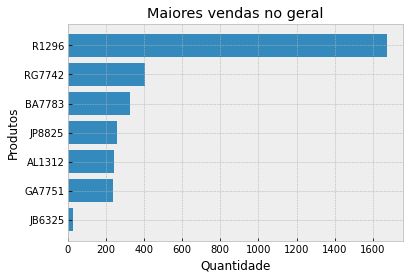

In [26]:
prodLoja = []
for index, row in df.iterrows():
    prodLoja.append(row['Loja'])

qntItemsLoja = [[n, prodLoja.count(n)] for n in set(prodLoja)]
qntItemsLoja = sorted(qntItemsLoja, key = lambda x : x[1])


plt.title("Maiores vendas no geral")
plt.xlabel("Quantidade")
plt.ylabel("Produtos")
plt.barh([n[0] for n in qntItemsLoja], [n[1] for n in qntItemsLoja])
plt.show()




#TODO: revisar resposta

## Busca L

In [27]:
# TODO: Ler a base e pegar apenas nome da loja, valor do produto, data da venda e vendedor
# TODO: set(vendedores)
# TODO: para cada vendedor: para cada loja: somar valor venda
# TODO: para cada vendedor: para cada ano: somar valor venda
# plotar o graf